# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hamdan Hidayat
- **Email:** hamyat86@gmail.com
- **ID Dicoding:** hamyat

# Pendahuluan
## Latar Belakang
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Dataset
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

# Menentukan Pertanyaan Bisnis

1. Bagaimana tren pengguna bike sharing bulanan, harian, dan per-jam?
2. Pada jam berapa penggunaan bike sharing tertinggi (Peak Time)?
3. Apakah ada korelasi antara variabel temperatur, kelembaban, dan kecepatan angin terhadap penggunaan bike sharing?
4. Bagaimana trend pengguna Bike Sharing berdasarkan musim, hari kerja, dan hari libur? 

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [3]:
# Load dataset ke dataframe
bike_hour_df = pd.read_csv("hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Catatan (Dataset Dictionary)
- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data
Sebelum dilakukan analisis terlebih dahulu dilakuan pengecekan duplikasi, missing values, dan inaccuracy.

In [4]:
# Check data types
print(bike_hour_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [5]:
# Check Miising Values
print(bike_hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# Ceck Duplicate Values
print(bike_hour_df.duplicated().sum())

0


In [7]:
# Statistical Summary
print(bike_hour_df.describe(include='all'))

           instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2012-12-31           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count  

### Rangkuman
- Tidak ditemukan duplikasi maupun missing value;
- Konversi data type dteday ke datetime;
- Mengubah variabel **season**, **weekday**, dan **mnth** dari integer ke value asalnya (nominal);
- Mengubah variabel yr dr 0 = 2011 dan 1 = 2012;
- Menormalisasi variabel temp, atemp, hum, windspeed sesuai dengan catatan di dataset 

### Cleaning Data
Sesuai dengan hasil asesmen awal, maka dilakukan penyesuaian

In [8]:
# Konversi tipe data dteday menjadi datetime
bike_hour_df['dteday'] = pd.to_datetime(bike_hour_df['dteday'])
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# change variable season value to nominal
bike_hour_df['season'] = bike_hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
# Convert variable month value to nominal
bike_hour_df['mnth'] = bike_hour_df['mnth'].apply(lambda x: calendar.month_name[x])
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# Extract weekday names from 'dteday'
bike_hour_df['weekday'] = bike_hour_df['dteday'].dt.day_name()
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# Correct value yr
bike_hour_df['yr'] = bike_hour_df['yr'].replace({0: 2011, 1: 2012})
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
# Mengembalikan nilai variabel temp, atemp, hum, windspeed ke nilai semula
bike_hour_df['temp'] = bike_hour_df['temp'] * 41
bike_hour_df['atemp'] = bike_hour_df['atemp'] * 50
bike_hour_df['hum'] = bike_hour_df['hum'] * 100
bike_hour_df['windspeed'] = bike_hour_df['windspeed'] * 67
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [13]:
# Menyimpan dataset ke file csv
bike_hour_df.to_csv('bikeshare_hour_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

Selanjutnya dilakukan eksplorasi analisis untuk melihat trend pengguna per-bulan, per-hari, dan per-jam. Untuk itu dataset yang digunakan adalah "hour.csv" yang sudah diload ke dataframe "bike_hour_df" karena fitur dataset tersebut memungkinkan untuk melakukan analisis trend tersebut.

In [14]:
bike_hour_df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Analisis Univariat

In [15]:
# Pivot Table temp, atemp, hum, windspeed
var_float = ['temp', 'atemp', 'hum', 'windspeed']
float_df = bike_hour_df[var_float]
float_df.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


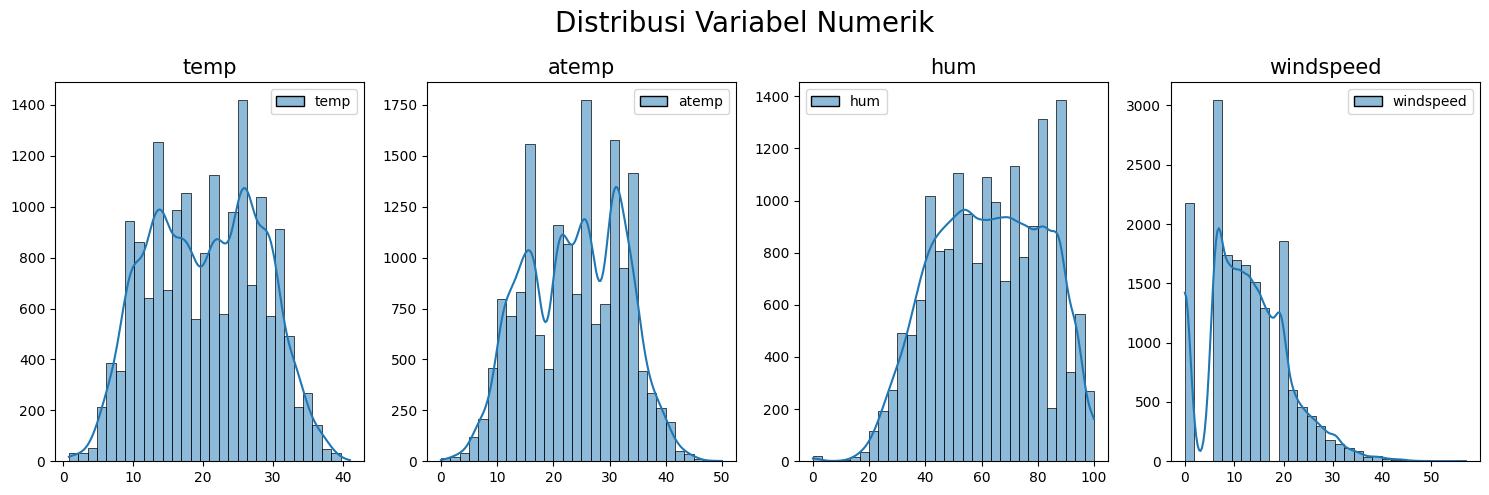

In [16]:
# membuat chart 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Distribusi Variabel Numerik', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, ax in enumerate(axes.flat):
    sns.histplot(float_df.iloc[:, [i]], ax=ax, kde=True, bins=30, color='blue')
    ax.set_title(var_float[i], fontsize=15)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

**Insight**
- Data variabel temp dan atemp terdistribusi normal
- Data Variabel kelembaban (hum) terlihat miring ke kiri (left skew)
- Data variabel kecepatan angin (windspeed) miring ke kanan (right skew)

### Boxplot

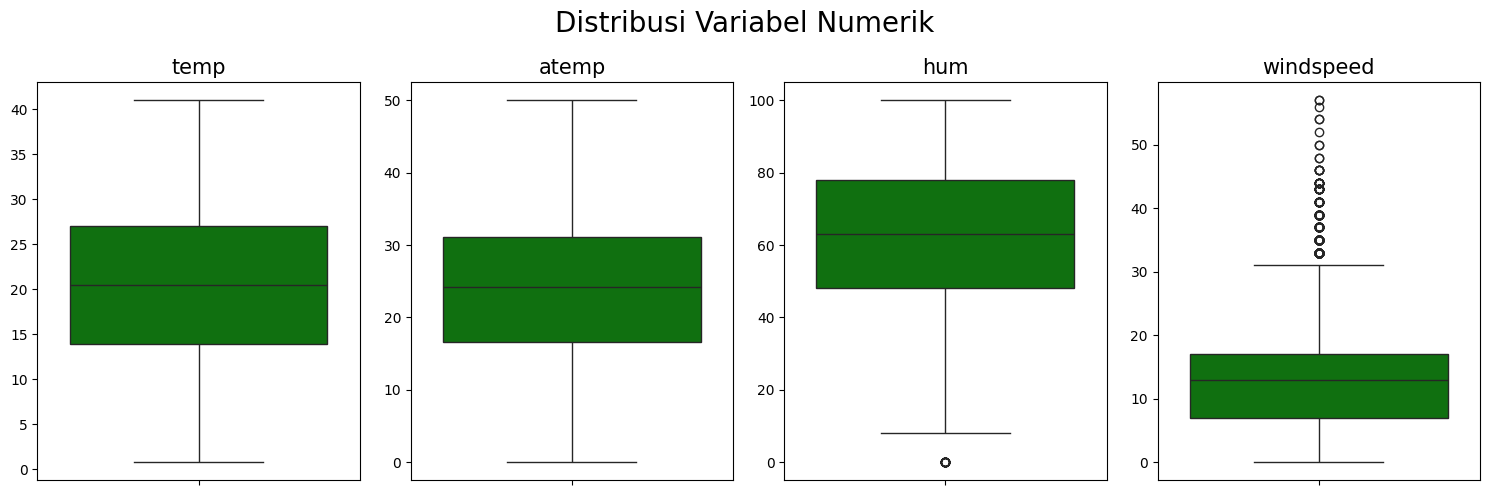

In [17]:
# Membuat boxplot 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Distribusi Variabel Numerik', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, ax in enumerate(axes.flat):
    sns.boxplot(y=float_df.iloc[:, i], ax=ax, color='green')
    ax.set_title(var_float[i], fontsize=15)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

**Insight**
- Tidak ditemukan outlier pada variabel temp dan atemp;
- Outlier pada variabel hum, dan windspeed.

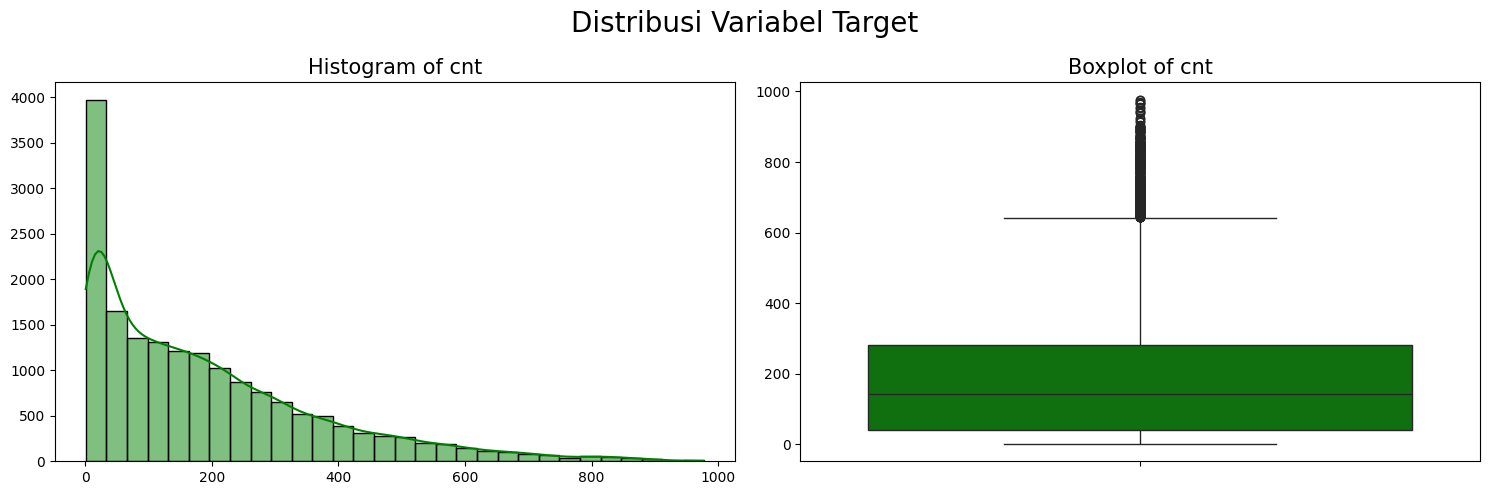

In [18]:
# Histogram dan boxplot variabel target 'cnt' pengguna bike-share
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribusi Variabel Target', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.histplot(data=bike_hour_df, x='cnt', ax=axes[0], kde=True, bins=30, color='green')
axes[0].set_title('Histogram of cnt', fontsize=15)
axes[0].set_xlabel('')
axes[0].set_ylabel('')
sns.boxplot(y=bike_hour_df['cnt'], ax=axes[1], color='green')
axes[1].set_title('Boxplot of cnt', fontsize=15)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

**Insight**
- Pada variabel jumlah pengguna bike sharing terlihat miring ke kanan dan terdapat outlier artinya datanya tidak terdistribusi normal

### Analisis Multivariat

/tmp/ipykernel_1226/1745369816.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Registered', 'Casual'], y=[registered_sum, casual_sum], ax=ax, palette=['#ff9999', '#66b3ff'])


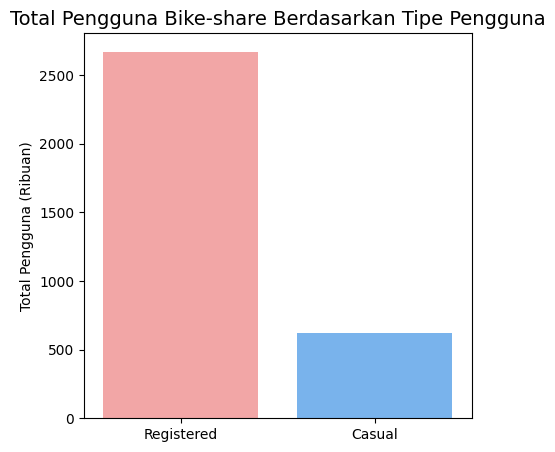

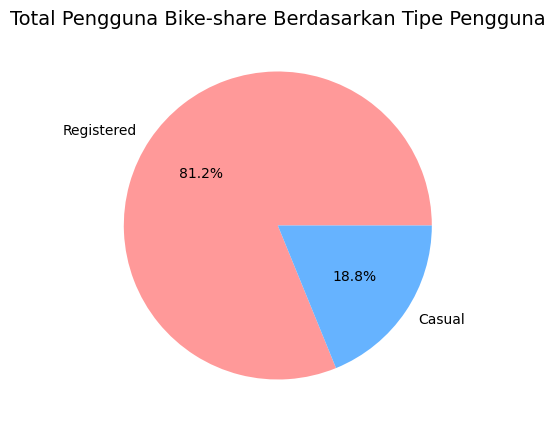

In [19]:
# Perbandingan jumlah pengguna bike-share berdasarkan tipe pengguna

registered_sum = bike_hour_df['registered'].sum() / 1000
casual_sum = bike_hour_df['casual'].sum() / 1000

# Barplot jumlah pengguna bike-share berdasarkan tipe pengguna
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=['Registered', 'Casual'], y=[registered_sum, casual_sum], ax=ax, palette=['#ff9999', '#66b3ff'])
ax.set_title('Total Pengguna Bike-share Berdasarkan Tipe Pengguna', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Total Pengguna (Ribuan)')
plt.show()

# Pie chart jumlah pengguna bike-share berdasarkan tipe pengguna
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie([registered_sum, casual_sum], labels=['Registered', 'Casual'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
ax.set_title('Total Pengguna Bike-share Berdasarkan Tipe Pengguna', fontsize=14)
plt.show()

**Insight**
- Pengguna bike sharing didominasi oleh pengguna Registered 81.2%

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pengguna bike sharing bulanan, harian, dan per-jam?

In [20]:
# Define the correct order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'mnth' to a categorical type with the correct order
bike_hour_df['mnth'] = pd.Categorical(bike_hour_df['mnth'], categories=month_order, ordered=True)

# Pivot data total pengguna bike sharing per bulan tahun 2011 dan 2012
# Pivot table per-bulan
pivot_by_month = bike_hour_df.pivot_table(index=['yr', 'mnth'], values=['casual', 'registered', 'cnt'], observed=True, aggfunc='sum')
display(pivot_by_month)  

casual     cnt  registered
yr   mnth                                 
2011 January      3073   38189       35116
     February     6242   48215       41973
     March       12826   64045       51219
     April       22346   94870       72524
     May         31050  135821      104771
     June        30612  143512      112900
     July        36452  141341      104889
     August      28842  136691      107849
     September   26545  127418      100873
     October     25222  123511       98289
     November    15594  102167       86573
     December     8448   87323       78875
2012 January      8969   96744       87775
     February     8721  103137       94416
     March       31618  164875      133257
     April       38456  174224      135768
     May         44235  195865      151630
     June        43294  202830      159536
     July        41705  203607      161902
     August      43197  214503      171306
     September   43778  218573      174795
     October     34538  198841      164303
     November    21009  152664      131655
     December    13245  123713      110468

In [21]:
# Pivot table per-hari
pivot_by_day = bike_hour_df.pivot_table(index=['yr', 'dteday', 'weekday', 'workingday'], values=['casual', 'registered', 'cnt'], aggfunc='sum')
display(pivot_by_day)

casual   cnt  registered
yr   dteday     weekday   workingday                          
2011 2011-01-01 Saturday  0              331   985         654
     2011-01-02 Sunday    0              131   801         670
     2011-01-03 Monday    1              120  1349        1229
     2011-01-04 Tuesday   1              108  1562        1454
     2011-01-05 Wednesday 1               82  1600        1518
...                                      ...   ...         ...
2012 2012-12-27 Thursday  1              247  2114        1867
     2012-12-28 Friday    1              644  3095        2451
     2012-12-29 Saturday  0              159  1341        1182
     2012-12-30 Sunday    0              364  1796        1432
     2012-12-31 Monday    1              439  2729        2290

[731 rows x 3 columns]

In [22]:
# Penggunan Bike Sharing per Jam
# Pivot table per-jam

pivot_by_hour = bike_hour_df.pivot_table(index=['dteday', 'hr'], values=['casual', 'registered', 'cnt'], aggfunc='sum')
display(pivot_by_hour)

casual  cnt  registered
dteday     hr                         
2011-01-01 0        3   16          13
           1        8   40          32
           2        5   32          27
           3        3   13          10
           4        0    1           1
...               ...  ...         ...
2012-12-31 19      11  119         108
           20       8   89          81
           21       7   90          83
           22      13   61          48
           23      12   49          37

[17379 rows x 3 columns]

In [23]:
print("Rata-rata Jumlah Pengguna Bike Sharing per-Jam:", round(bike_hour_df['cnt'].mean(), 2))
print("Rata-rata Jumlah Pengguna Bike Sharing per-Hari:", round(pivot_by_day['cnt'].mean(), 2))
print("Rata-rata Jumlah Pengguna Bike Sharing per-Bulan:", round(pivot_by_month['cnt'].mean(), 2))

Rata-rata Jumlah Pengguna Bike Sharing per-Jam: 189.46
Rata-rata Jumlah Pengguna Bike Sharing per-Hari: 4504.35
Rata-rata Jumlah Pengguna Bike Sharing per-Bulan: 137194.96


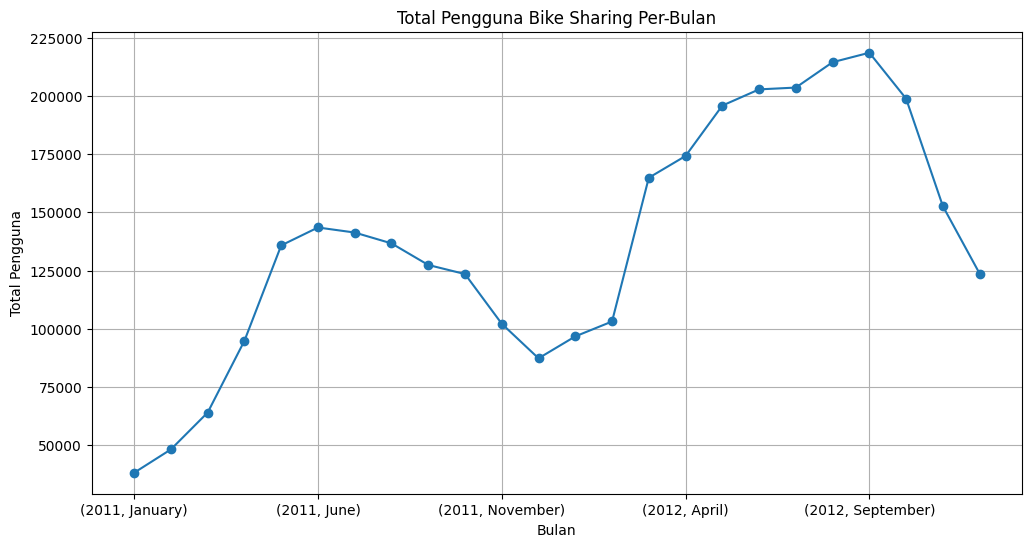

In [24]:
# Plot total pengguna bike sharing per bulan
plt.figure(figsize=(12, 6))
pivot_by_month['cnt'].plot(kind='line', marker='o')
plt.title('Total Pengguna Bike Sharing Per-Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Pengguna')
plt.grid(True)
plt.show()

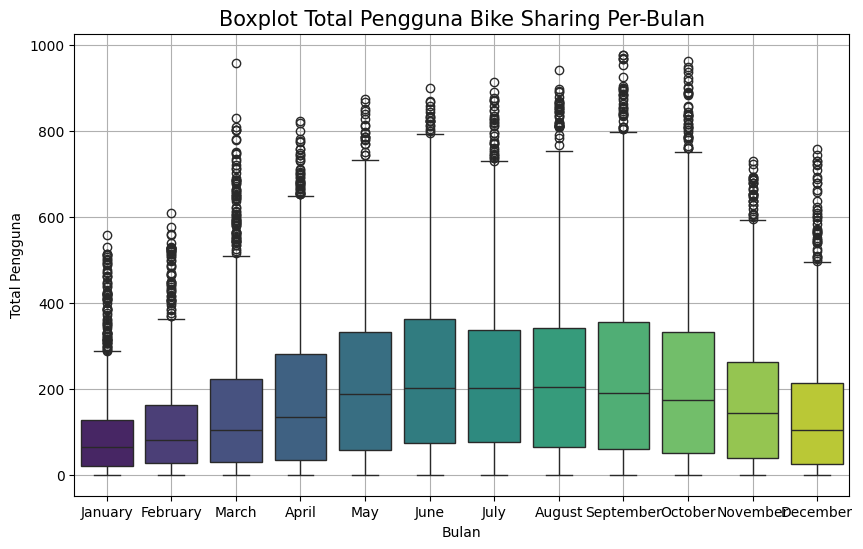

In [25]:
# Bike Sharing per Bulan
# Plot total pengguna bike sharing per bulan
# Boxplot 'cnt' per-bulan
plt.figure(figsize=(10, 6))
sns.boxplot(x='mnth', y='cnt', hue='mnth', data=bike_hour_df, palette='viridis')
plt.title('Boxplot Total Pengguna Bike Sharing Per-Bulan', fontsize=15)
plt.xlabel('Bulan')
plt.ylabel('Total Pengguna')
plt.grid(True)
plt.show()

**Insight**
- Pengguna bike sharing cenderung tinggi di bulan-bulan musim panas Juni hingga September
- Rata-rata pengguna per-bulan sebesar 137194.96

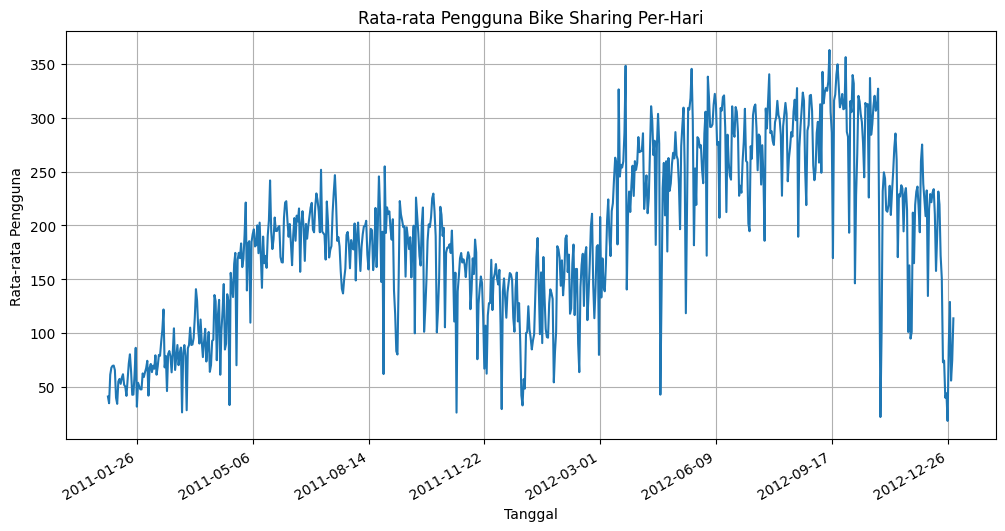

In [26]:
# Visualisasi jumlah pengguna bike sharing per hari pivot_by_day
# Plot total pengguna bike sharing per hari
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import DateFormatter

# Group by date and calculate the mean for each day
daily_avg_users = bike_hour_df.groupby(bike_hour_df['dteday'].dt.date)['cnt'].mean()

# Plot the daily average users
plt.figure(figsize=(12, 6))
daily_avg_users.plot()
plt.title('Rata-rata Pengguna Bike Sharing Per-Hari')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Pengguna')
plt.grid(True)

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(10))  # Show 10 date ticks
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.show()

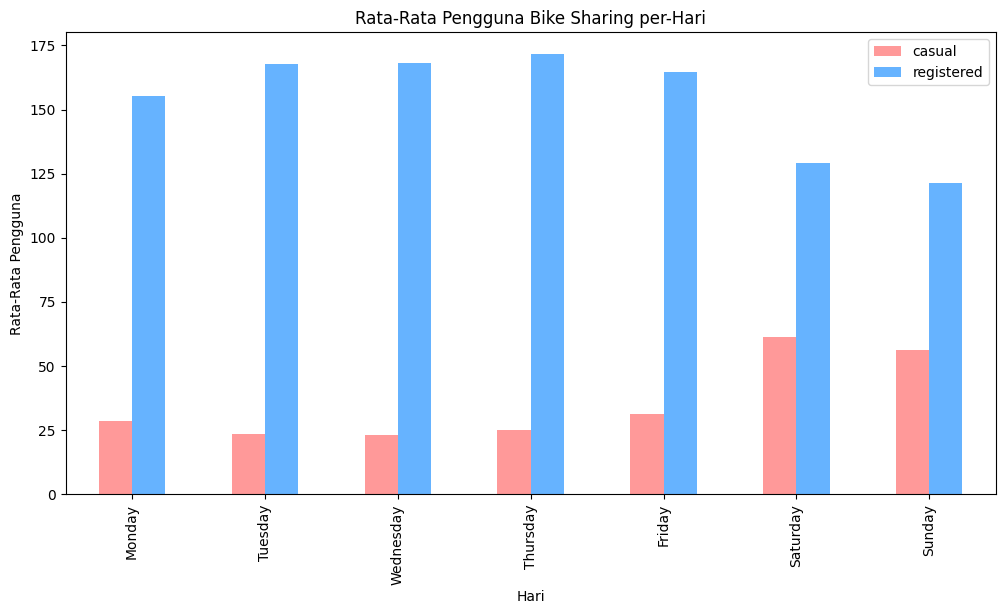

In [27]:
# Create average daily values for casual and registered users
daily_avg = bike_hour_df.groupby('weekday')[['casual', 'registered', 'cnt']].mean()
daily_avg = daily_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot average daily values for casual and registered users
fig, ax = plt.subplots(figsize=(12, 6))
daily_avg[['casual', 'registered']].plot(kind='bar', ax=ax, color=['#ff9999', '#66b3ff'])
ax.set_title('Rata-Rata Pengguna Bike Sharing per-Hari')
ax.set_xlabel('Hari')
ax.set_ylabel('Rata-Rata Pengguna')
plt.show()  

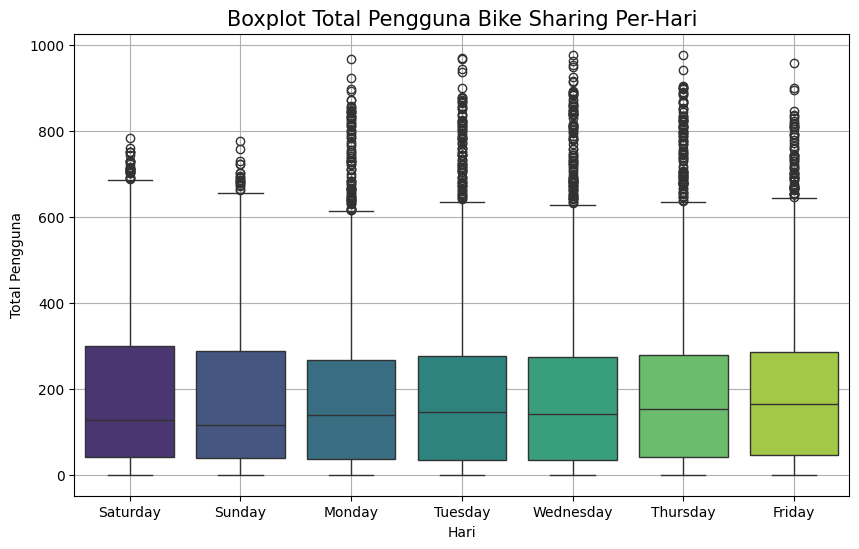

In [28]:
# Boxplot 'cnt' per-hari
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', hue='weekday', data=bike_hour_df, palette='viridis')
plt.title('Boxplot Total Pengguna Bike Sharing Per-Hari', fontsize=15)
plt.xlabel('Hari')
plt.ylabel('Total Pengguna')
plt.grid(True)
plt.show()

**Insight**
- Berdasarkan hari jumlah pengguna bike sharing relatif sama, dengan hari tersibuk Senin hingga Jum'at dan cenderung menurun di akhir pekan.
- Rata-rata pengguna per-hari sebesar 4504.35
- Pengguna casual meningkat di akhir pekan (Sabtu dan Minggu)
- Ditemukan banyak outlier artinya jumlah pengguna cenderung melonjak

### Pertanyaan 2: Pada jam berapa penggunaan bike sharing tertinggi (Peak Time)?

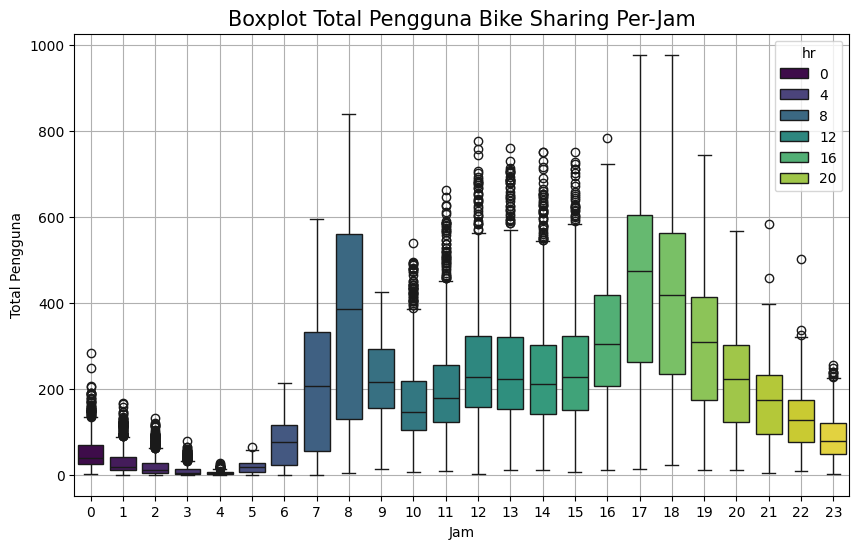

In [29]:
# Boxplot 'cnt' mean per-jam

plt.figure(figsize=(10, 6))
sns.boxplot(x='hr', y='cnt', hue='hr', data=bike_hour_df, palette='viridis')
plt.title('Boxplot Total Pengguna Bike Sharing Per-Jam', fontsize=15)
plt.xlabel('Jam')
plt.ylabel('Total Pengguna')
plt.grid(True)
plt.show()

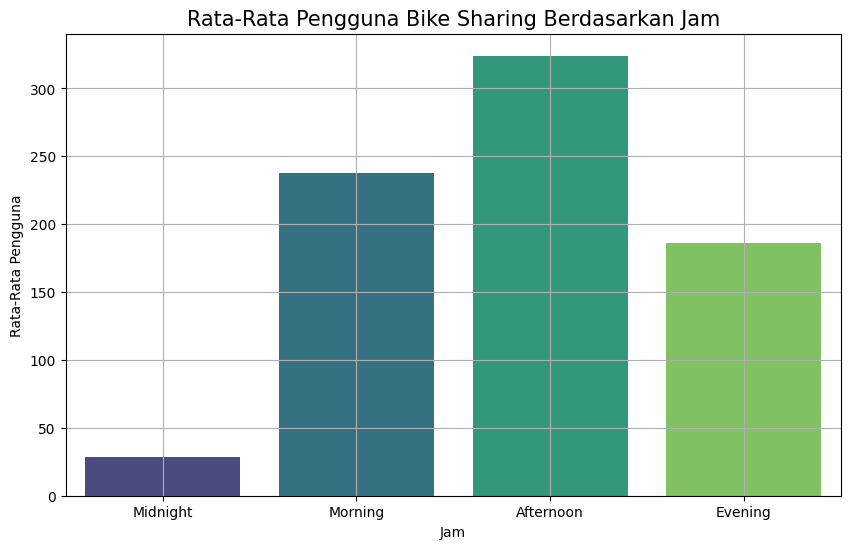

In [30]:
# Visualisasi cluster pengguna bike sharing berdasarkan jam rendah, sedang, dan tinggi
# Create a new column 'hour_range' based on 'hr' values
bike_hour_df['hour_range'] = pd.cut(bike_hour_df['hr'], bins=[0, 6, 12, 18, 24], labels=['Midnight', 'Morning', 'Afternoon', 'Evening'])

# Group by 'hour_range' and calculate the mean of 'cnt'
grouped_hour_range = bike_hour_df.groupby('hour_range', observed=False)['cnt'].mean().reset_index()

# Plot the average 'cnt' per 'hour_range'
plt.figure(figsize=(10, 6))
sns.barplot(x='hour_range', y='cnt', hue='hour_range', data=grouped_hour_range, palette='viridis')
plt.title('Rata-Rata Pengguna Bike Sharing Berdasarkan Jam', fontsize=15)
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Pengguna')
plt.grid(True)
plt.show()

**Insight**
- Jam sibuk terjadi anatar pukul 06.00 hingga pukul 18.00 dengan peak time pada pukul 17.00 hingga 18.00 yang ditandai dengan tingginya jumlah pengguna pada jam-jam tersebut. Hal ini sesuai dengan aktivitas normal manusia mulai pagi hari hingga menjelang malam hari.
- Rata-rata pengguna per-jam sebesar 189.46
- Pengguna berkurang pada tengah malam pukul 00.00 hingga pukul 05.00

### Pertanyaan 3: Apakah ada korelasi antara variabel temperatur, kelembaban, dan kecepatan angin terhadap penggunaan bike sharing?

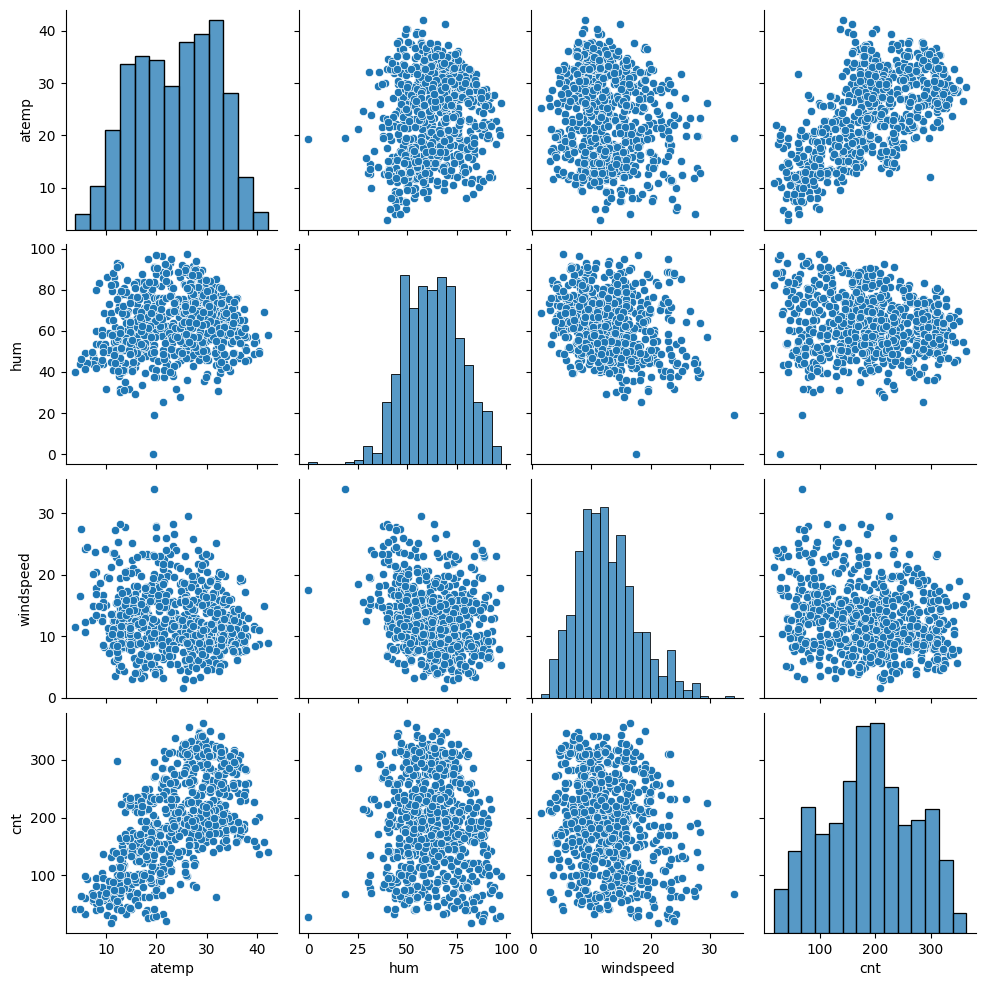

In [31]:
# Untuk menjawab pertanyaan No. 2 digunakan scatterplot untuk melihat hubungan antar variable
grouped_df = bike_hour_df.groupby('dteday')[["atemp", "hum", "windspeed", "cnt"]].mean().reset_index()
sns.pairplot(grouped_df, kind="scatter")

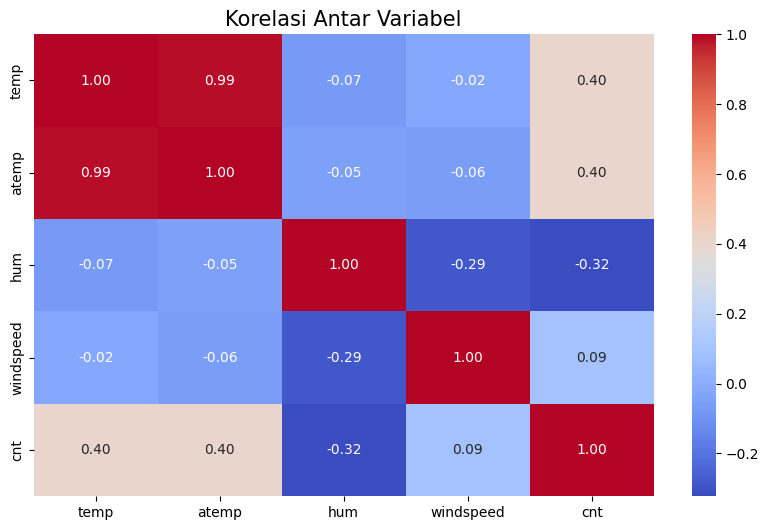

In [32]:
# Visualisasi menggunakan heatmap
# Correlation matrix
corr_matrix = bike_hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel', fontsize=15)
plt.show()

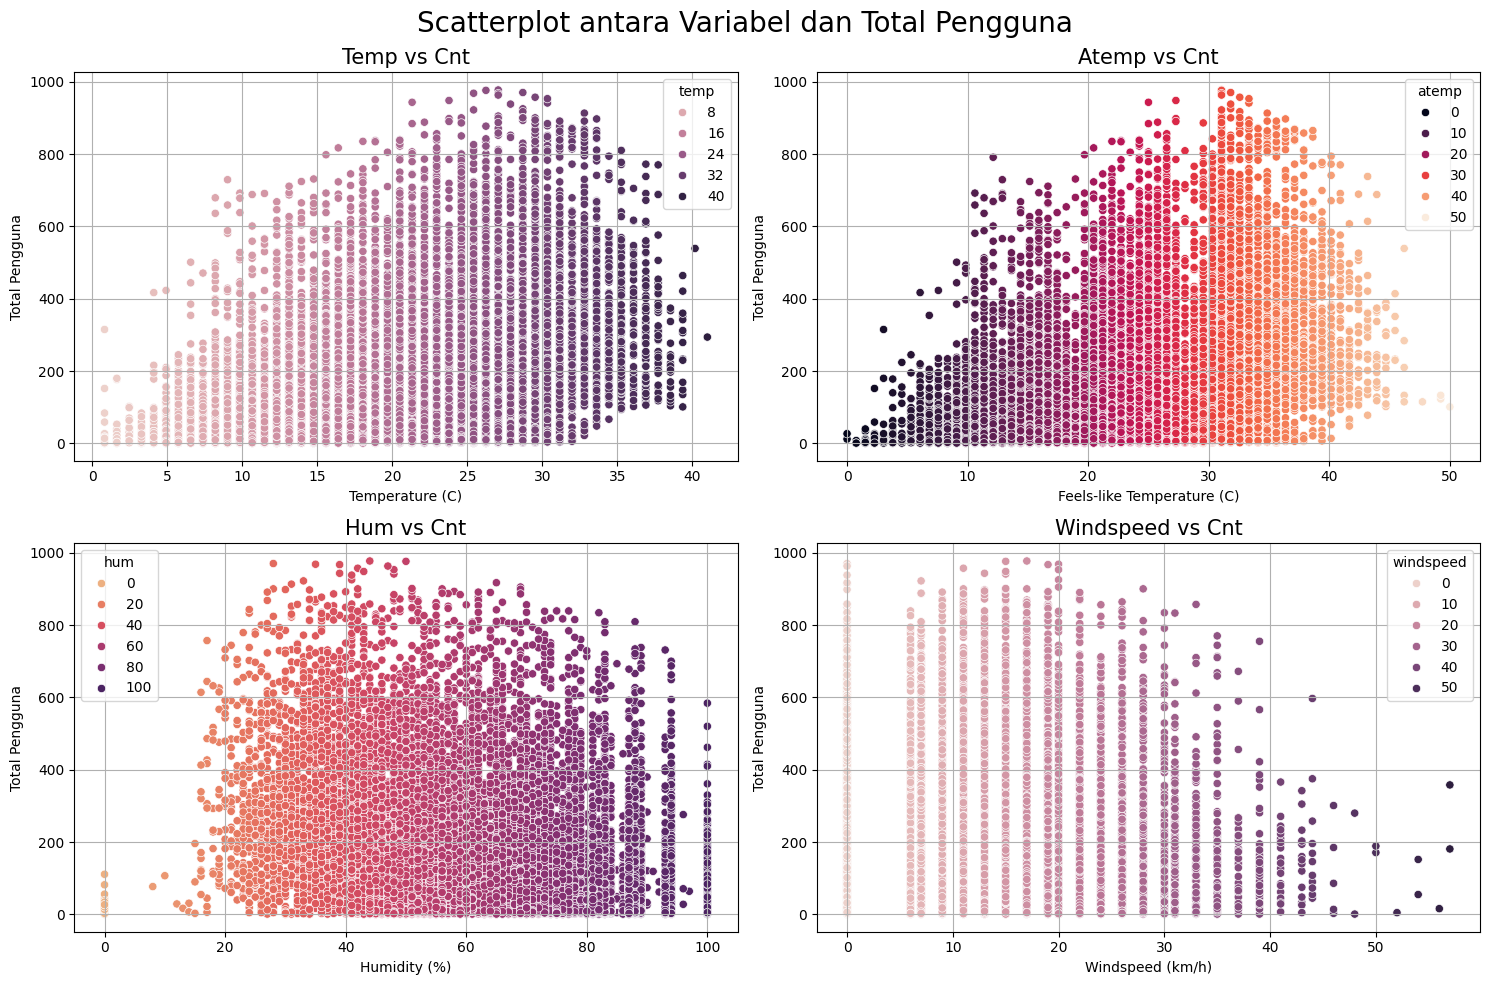

In [33]:
# Visualisasi menggunakan scatterplot dalam 4 subplots
# Visualisasi menggunakan scatterplot dalam 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatterplot antara Variabel dan Total Pengguna', fontsize=20)

# Scatterplot antara variabel 'temp' dan 'cnt'
sns.scatterplot(x='temp', y='cnt', hue='temp', data=bike_hour_df, color='rocket', ax=axes[0, 0])
axes[0, 0].set_title('Temp vs Cnt', fontsize=15)
axes[0, 0].set_xlabel('Temperature (C)')
axes[0, 0].set_ylabel('Total Pengguna')
axes[0, 0].grid(True)

# Scatterplot antara variabel 'atemp' dan 'cnt'
sns.scatterplot(x='atemp', y='cnt', hue='atemp', data=bike_hour_df, palette='rocket', ax=axes[0, 1])
axes[0, 1].set_title('Atemp vs Cnt', fontsize=15)
axes[0, 1].set_xlabel('Feels-like Temperature (C)')
axes[0, 1].set_ylabel('Total Pengguna')
axes[0, 1].grid(True)

# Scatterplot antara variabel 'hum' dan 'cnt'
sns.scatterplot(x='hum', y='cnt', hue='hum', data=bike_hour_df, palette='flare', ax=axes[1, 0])
axes[1, 0].set_title('Hum vs Cnt', fontsize=15)
axes[1, 0].set_xlabel('Humidity (%)')
axes[1, 0].set_ylabel('Total Pengguna')
axes[1, 0].grid(True)

# Scatterplot antara variabel 'windspeed' dan 'cnt'
sns.scatterplot(x='windspeed', y='cnt', hue='windspeed', data=bike_hour_df, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Windspeed vs Cnt', fontsize=15)
axes[1, 1].set_xlabel('Windspeed (km/h)')
axes[1, 1].set_ylabel('Total Pengguna')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

**Insight**
- temp dan cnt: dengan koefisien 0.4 mengindikasikan berkorelasi positif moderat, artinya ketika suhu meningkat jumlah pengguna bike sharing juga cenderung meningkat.
- hum dan cnt: dengan koefisien -0.32 menunjukkan korelasi negatif moderat, artinya kelembaban meningkat pengguna bike sharing cenderung menurun.
- windspeed dan cnt: A correlation of -0.09 menunjukkan korelasi negatif lemah, artinya seiring dengan kecepatan angin meningkat, pengguna bike sharing cenderung agak berkurang.

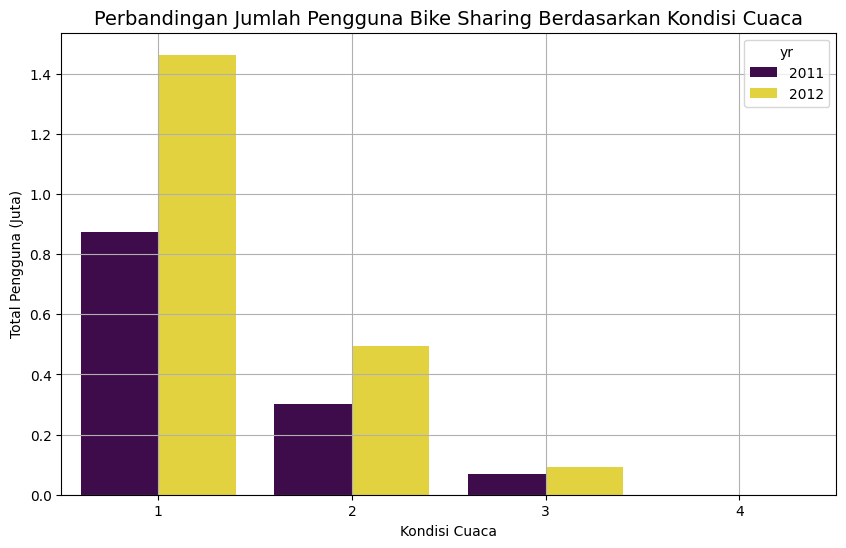

In [34]:
# Menggunakan pivot by weathersit
pivot_by_weathersit = bike_hour_df.groupby(["yr", "weathersit"])[["casual", "registered", "cnt"]].sum()/1000000

# Plot comparison of bike sharing usage by weathersit
pivot_by_weathersit = pivot_by_weathersit.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', hue='yr', data=pivot_by_weathersit, palette='viridis')
plt.title('Perbandingan Jumlah Pengguna Bike Sharing Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Pengguna (Juta)')
plt.grid(True)
plt.show()

**Insight**
- Berdasarkan kondisi cuaca pengguna bike sharing tinggi ketika cuaca cerah atau mendung (kategori 1)
- Tidak ada pengguna ketika cuaca sangat buruk (Kategori 4)

### Pertanyaan 4: Bagaimana trend pengguna Bike Sharing berdasarkan, musim, hari kerja, dan hari libur?

In [35]:
# Menggunakan pivot by season
pivot_by_season = bike_hour_df.groupby(["season", "yr"])[["casual", "registered", "cnt"]].sum()
pivot_by_season

casual  registered     cnt
season yr                              
Fall   2011   95450      324200  419650
       2012  130641      510838  641479
Spring 2011   21425      128575  150000
       2012   39197      282151  321348
Summer 2011   77564      269752  347316
       2012  125958      445315  571273
Winter 2011   52813      273324  326137
       2012   76969      438507  515476

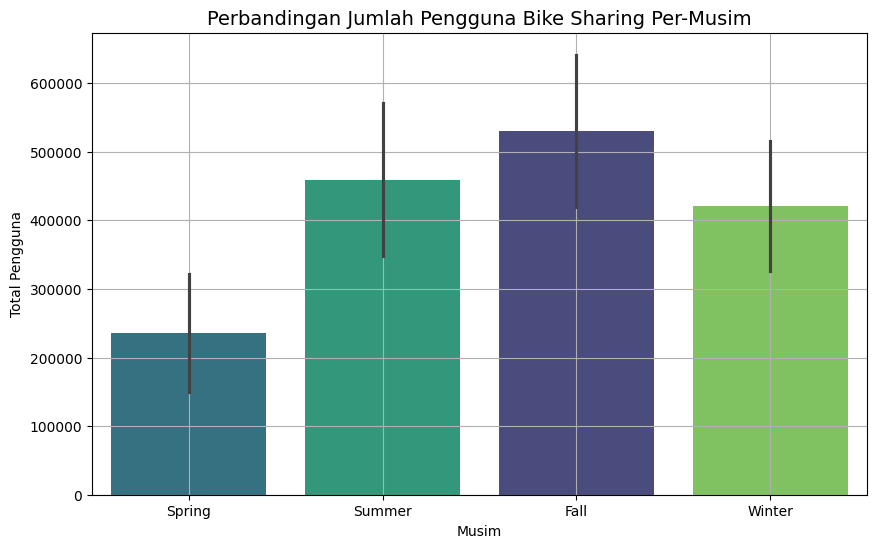

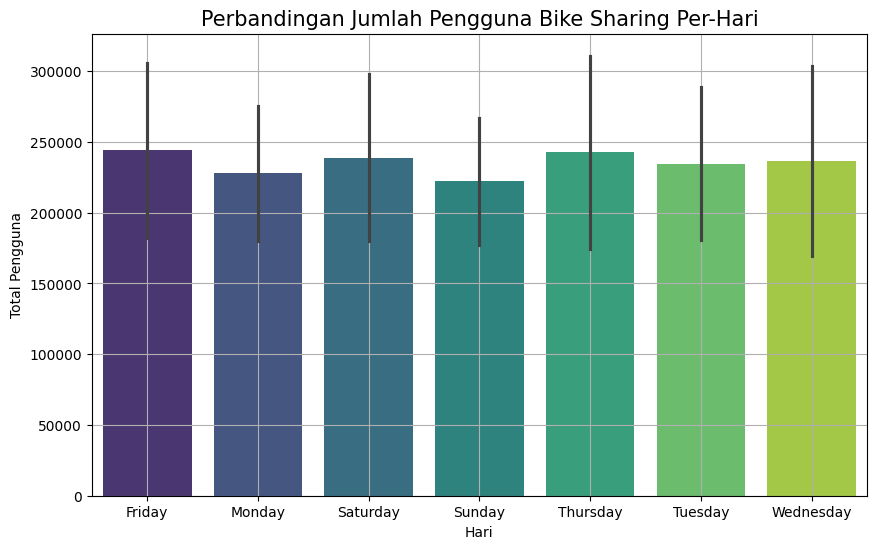

/tmp/ipykernel_1226/2926479597.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=pivot_by_workingday, palette='viridis')


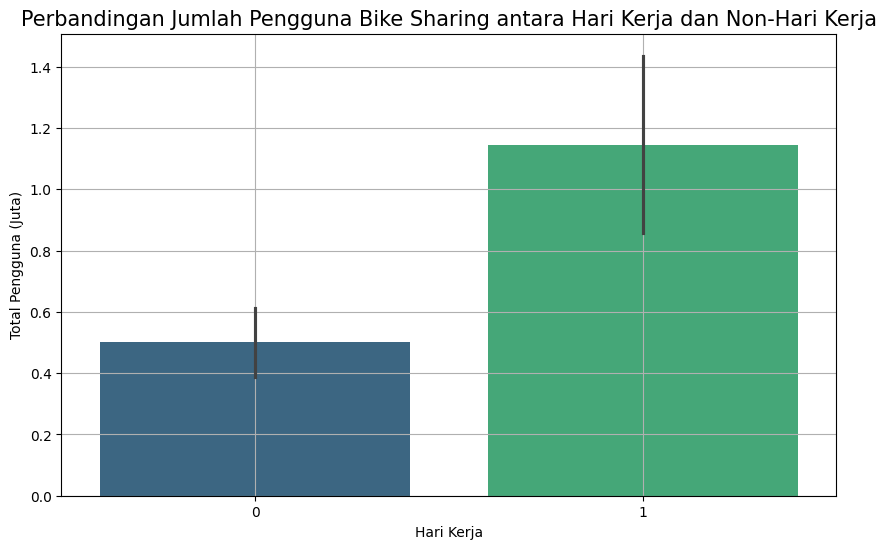

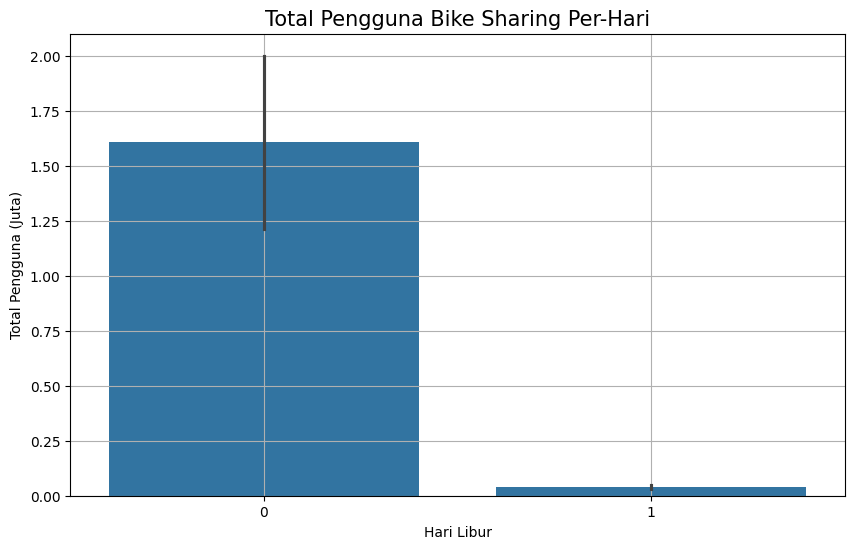

In [41]:
# Plot comparison of bike sharing usage by season
# pivot_by_season = pivot_by_season.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='season', data=pivot_by_season, palette='viridis', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Perbandingan Jumlah Pengguna Bike Sharing Per-Musim', fontsize=14)
plt.xlabel('Musim')
plt.ylabel('Total Pengguna')
plt.grid(True)
plt.show()

# Menggunakan pivot by weekday
pivot_by_weekday = bike_hour_df.groupby(["yr", "weekday"])[["casual", "registered", "cnt"]].sum()

# Plot comparison of bike sharing usage by weekday
pivot_by_weekday = pivot_by_weekday.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', hue='weekday', data=pivot_by_weekday, palette='viridis')
plt.title('Perbandingan Jumlah Pengguna Bike Sharing Per-Hari', fontsize=15)
plt.xlabel('Hari')
plt.ylabel('Total Pengguna')
plt.grid(True)
plt.show()

# Menggunakan pivot by workingday
pivot_by_workingday = bike_hour_df.groupby(["yr", "workingday"])[["casual", "registered", "cnt"]].sum()/1000000

# Plot comparison of bike sharing usage by workingday
pivot_by_workingday = pivot_by_workingday.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=pivot_by_workingday, palette='viridis')
plt.title('Perbandingan Jumlah Pengguna Bike Sharing antara Hari Kerja dan Non-Hari Kerja', fontsize=15)
plt.xlabel('Hari Kerja')
plt.ylabel('Total Pengguna (Juta)')
plt.grid(True)
plt.show()

# Menggunakan pivot by holiday
pivot_by_holiday = bike_hour_df.groupby(["yr", "holiday"])[["casual", "registered", "cnt"]].sum()/1000000

# Plot comparison of bike sharing usage by holiday
pivot_by_holiday = pivot_by_holiday.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=pivot_by_holiday)
plt.title('Total Pengguna Bike Sharing Per-Hari', fontsize=15)
plt.xlabel('Hari Libur')
plt.ylabel('Total Pengguna (Juta)')
plt.grid(True)
plt.show()

**Insight**
- Jumlah pengguna terbanyak pada musim gugur (Fall), kemudian summer di posisi kedua;
- Jumlah pengguna terbanyak pada hari Jum'at
- Jumlah pengguna terbanyak pada hari kerja, hal ini wajar karena jumlah hari kerja lebih banyak dibanding dengan hari akhir pekan
- Berdasarkan hari libur dan non-libur, jumlah pengguna juga lebih banyak pada non-hari libur

## Simpulan

- **Pertanyaan 1:** Tren pengguna bike sharing tinggi di bulan Juni hingga September dengan rata-rata per bulan 137194.96; berdasarkan hari pengguna cenderung tinggi pada hari kerja (Senin s.d Jum'at) dan menurun di akhir pekan, rata-rata harian sebesar 4504.35;  
- **Pertanyaan 2:** Berdasarkan jam tren pengguna cenderung tinggi di pagi hingga siang hari antara pukul 08.00 hingga pukul 18.00, dan cenderung menurun di malam hari hingga pagi antara pukul 00.00 hingga 06.00;
- **Pertanyaan 3:** Ada korelasi positif moderat antara jumlah pengguna dengan variabel suhu udara (temp) dengan koefisien 0.4, sedangkan kelembaban (hum) dan  kecepatan angin (winspeed) berkorelasi negatif; Berdasarkan cuaca pengguna cenderung tinggi ketika cuaca cerah atau mendung, menurun ketika cuaca buruk, dan tidak ada pengguna ketik cuaca sangat buruk.
- **Pertanyaan 4:** Pengguna cenderung tinggi di musim Panas dan Gugur, dan berkurang di musim dingin dan semi; Pengguna tertinggi pada hari Jum'at, pengguna juga tinggi pada hari kerja dibandingkan dengan akhir pekan atau hari libur.